In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('movies.csv')

In [4]:
df.head()

,IMDB,MOVIE TITLE,Release Date,Cast,Duration,Production,Genre,Country
0,NaN,Time Addicts,2023-10-27,"['Freya Tingley', 'Elise Jansen', 'Charles Gro...",97\n min,Exile Productions,NaN,NaN
1,NaN,Numb,2023-08-31,"['Kiana Mehdi Abadi', 'Ayhan Shaygan', 'Nora H...",91\n min,Not Defined,NaN,NaN
2,NaN,Monolith,2023-10-26,"['Damon Herriman', 'Ansuya Nathan', 'Brigid Ze...",94\n min,South Australian Film Corporation,NaN,NaN
3,NaN,Model,2021-08-25,"['Brett Benowitz', 'Elijah Lockhart', 'Trin Mi...",12\n min,Muskrat Content,NaN,NaN
4,NaN,Kampon,2023-12-25,"['Alfonso Ynigo Delen', 'Nico Antonio', 'Lui M...",91\n min,Quantum Films,NaN,NaN


In [6]:
df.shape

(160, 8)

In [7]:
# Converting the duration to only minutes:

def convert_to_minutes(duration):
    try:
        minutes = int(duration.split()[0])
        return minutes
    except:
        return None

In [8]:
df['Duration'] = df['Duration'].apply(convert_to_minutes)

In [10]:
# Imputing the unfilled IMDB values to mean

df['IMDB'] = pd.to_numeric(df['IMDB'], errors='coerce')
mean_imdb = df['IMDB'].mean()
df['IMDB'].fillna(mean_imdb, inplace=True)


In [11]:
df.head()

,IMDB,MOVIE TITLE,Release Date,Cast,Duration,Production,Genre,Country
0,5.851351,Time Addicts,2023-10-27,"['Freya Tingley', 'Elise Jansen', 'Charles Gro...",97,Exile Productions,NaN,NaN
1,5.851351,Numb,2023-08-31,"['Kiana Mehdi Abadi', 'Ayhan Shaygan', 'Nora H...",91,Not Defined,NaN,NaN
2,5.851351,Monolith,2023-10-26,"['Damon Herriman', 'Ansuya Nathan', 'Brigid Ze...",94,South Australian Film Corporation,NaN,NaN
3,5.851351,Model,2021-08-25,"['Brett Benowitz', 'Elijah Lockhart', 'Trin Mi...",12,Muskrat Content,NaN,NaN
4,5.851351,Kampon,2023-12-25,"['Alfonso Ynigo Delen', 'Nico Antonio', 'Lui M...",91,Quantum Films,NaN,NaN


In [17]:
pivot_df = df.pivot_table(index='Genre', columns='Duration', values='IMDB')

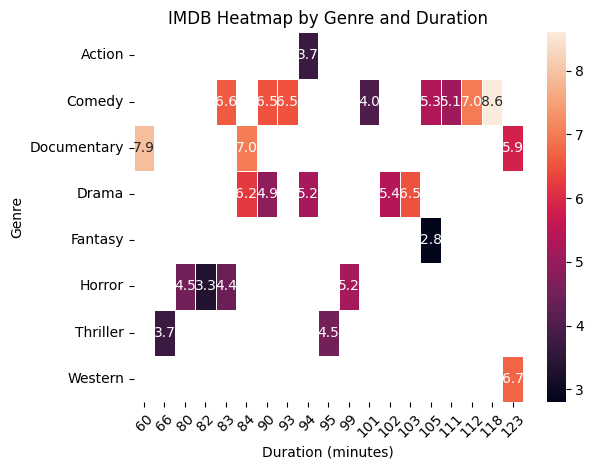

In [21]:
sns.heatmap(pivot_df, annot=True, fmt=".1f", linewidths=.5)
plt.title('IMDB Heatmap by Genre and Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

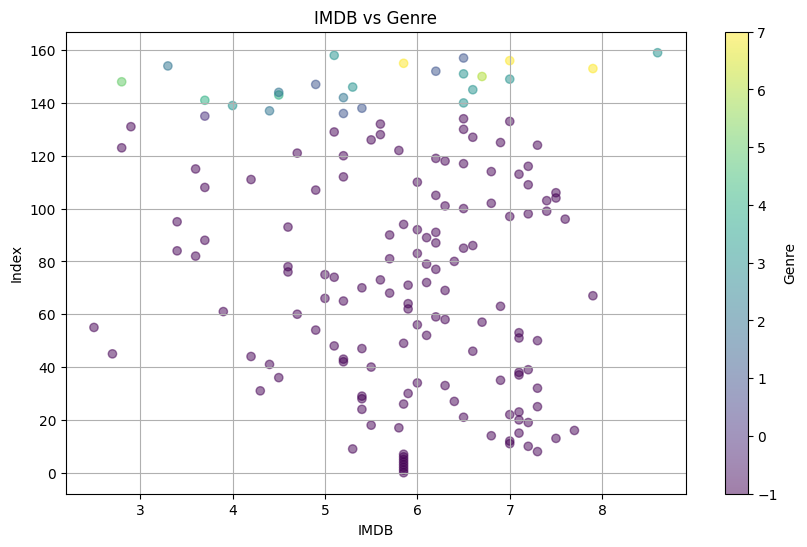

In [22]:
# Plotting IMDb vs Genre (assuming Genre is categorical)

plt.figure(figsize=(10, 6))
plt.scatter(df['IMDB'], df.index, c=pd.factorize(df['Genre'])[0], cmap='viridis', alpha=0.5)
plt.title('IMDB vs Genre')
plt.xlabel('IMDB')
plt.ylabel('Index')
plt.colorbar(label='Genre')
plt.grid(True)
plt.show()

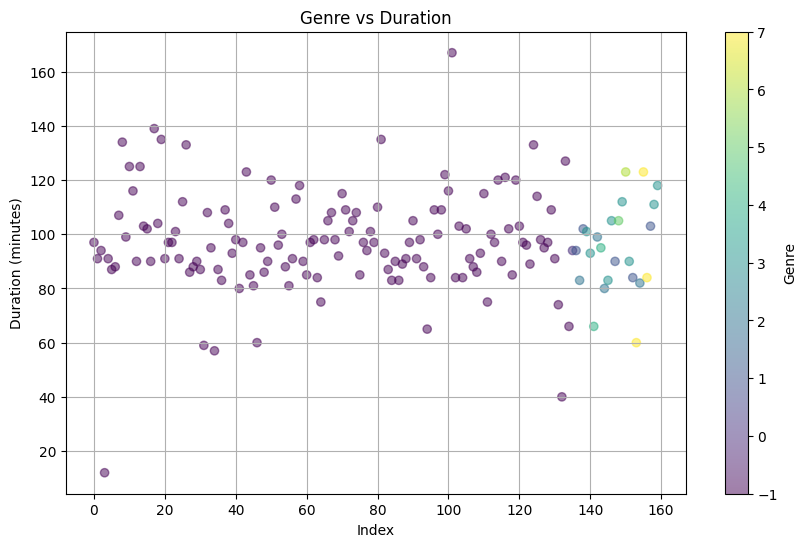

In [25]:
# Plotting Genre vs Duration
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Duration'], c=pd.factorize(df['Genre'])[0], cmap='viridis', alpha=0.5)
plt.title('Genre vs Duration')
plt.xlabel('Index')
plt.ylabel('Duration (minutes)')
plt.colorbar(label='Genre')
plt.grid(True)
plt.show()

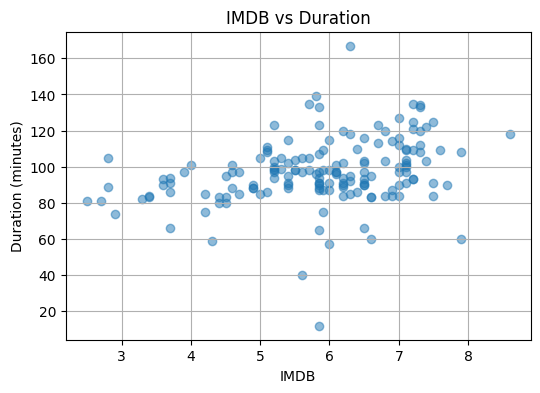

In [23]:
# Plotting the relations between the IMDB and Duration

plt.figure(figsize=(6,4))
plt.scatter(df['IMDB'], df['Duration'], alpha=0.5)
plt.title('IMDB vs Duration')
plt.xlabel('IMDB')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()